# 5. Program to implement Independent Component Analysis (ICA).

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [4]:
# Generate some random data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

In [5]:
# Mix the signals
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)

# Create ICA object
ica = FastICA(n_components=2)

# Fit and transform the mixed signals
S_ = ica.fit_transform(X)

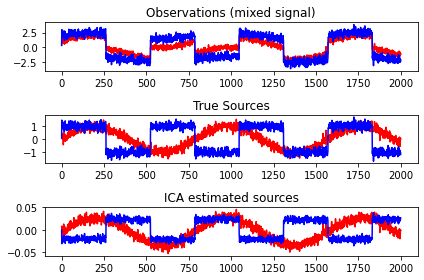

In [6]:
# Plot the results
plt.figure()
models = [X, S, S_]
names = ['Observations (mixed signal)', 'True Sources', 'ICA estimated sources']
colors = ['red', 'blue']
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()